In [1]:
import numpy as np
from pprint import pprint

import os
from pathlib import Path
from dwsimopt.utils import PATH2DWSIMOPT

dir_path = str(Path(os.getcwd()).parent.absolute())
print(dir_path)

import sys
sys.path.append(dir_path)
if 'dwsimopt.sim_opt' in sys.modules:  # Is the module in the register?
    del sys.modules['dwsimopt.sim_opt']  # If so, remove it.
    del SimulationOptimization
from dwsimopt.sim_opt import SimulationOptimization

c:\Users\lfsfr\Desktop\dwsimopt\examples


In [39]:
# Getting DWSIM path from system path
for k,v in enumerate(os.environ['path'].split(';')):
    if v.find('\DWSIM')>-1:
        path2dwsim = os.path.join(v, '')
if path2dwsim == None:
    path2dwsim = "C:\\Users\\lfsfr\\AppData\\Local\\DWSIM7\\"   #insert manuall
path2dwsim = "C:\\Users\\lfsfr\\AppData\\Local\\DWSIM7\\"   #insert manuall
print(path2dwsim)

# Loading DWSIM simulation into Python (Simulation object)
sim = SimulationOptimization(dof=np.array([]), path2sim= os.path.join(dir_path, "PRICO_LNG_compositeCurve\\PRICO_composite.dwxmz"), 
                     path2dwsim = path2dwsim, savepath = os.path.join(dir_path, "PRICO_LNG_compositeCurve\\PRICO_composite2.dwxmz"))
sim.add_refs()

# Instanciate automation manager object
from DWSIM.Automation import Automation2
if ('interf' not in locals()):    # create automation manager
    interf = Automation2()

# Connect simulation in sim.path2sim
sim.connect(interf)

C:\Users\lfsfr\AppData\Local\DWSIM7\
added refs
Simulation was loaded successfully


In [40]:
from dwsimopt.py2dwsim import * 

# Assign DoF:
create_pddx( ["MR-1", "CompoundMassFlow", "Nitrogen", "kg/s"],    sim, element="dof" )
create_pddx( ["MR-1", "CompoundMassFlow", "Methane", "kg/s"],     sim, element="dof" )
create_pddx( ["MR-1", "CompoundMassFlow", "Ethane", "kg/s"],      sim, element="dof" )
create_pddx( ["MR-1", "CompoundMassFlow", "Propane", "kg/s"],     sim, element="dof" )
create_pddx( ["VALV-01", "OutletPressure", "Mixture", "Pa"],      sim, element="dof" )
create_pddx( ["COMP-4", "OutletPressure", "Mixture", "Pa"],       sim, element="dof" )

# Assign F
create_pddx( ["Sum_W", "EnergyFlow", "Mixture", "kW"], sim, element="fobj" )

# Adding constraints (g_i <= 0):
x0 = np.array( [1.3*1.12083333e-04, 1.3*2.20416667e-04, 1.3*1.42216680e-04, 1.3*7.54165016e-04, 3.45000000e+05, 7.20000000e+06] )
sim.calculate_optProblem(1.0*x0)
spd = sim.flowsheet.GetSpreadsheetObject()
# there_is_data = True
# # print(there_is_data)
# i=1
# # T = np.array([], dtype="object")
# # t = np.array([], dtype="object")
# # Q = np.array([], dtype="object")
# while there_is_data:
#     # print([spd.Worksheets[0].Cells[i,0].Data, spd.Worksheets[0].Cells[i,1].Data, spd.Worksheets[0].Cells[i,2].Data])
#     i = i+1
#     if spd.Worksheets[0].Cells[i,0].Data==None:
#         there_is_data = False
kk = int(create_pddx( ["MITA1-Calc", "InputVariables", "k", "x"], sim, element="constraint", assign=False )[0]()) +1
TT = np.ndarray(kk, dtype="object")
tt = np.ndarray(kk, dtype="object")
QQ = np.ndarray(kk, dtype="object")
for ii in range(kk):
    TT[ii] = lambda: spd.Worksheets[0].Cells[ii,0].Data
    tt[ii] = lambda: spd.Worksheets[0].Cells[ii,1].Data
    QQ[ii] = lambda: spd.Worksheets[0].Cells[ii,2].Data
    # TT[ii] = create_pddx( ["MITA1-Calc", "OutputVariable", "TT_"+str(ii), "°C"], sim, element="constraint", assign=False )[0]
    # tt[ii] = create_pddx( ["MITA1-Calc", "OutputVariable", "tt_"+str(ii), "°C"], sim, element="constraint", assign=False )[0]
    # QQ[ii] = create_pddx( ["MITA1-Calc", "OutputVariable", "QQ_"+str(ii), "°C"], sim, element="constraint", assign=False )[0]
# TT = create_pddx( ["Spreadsheet", "Celss", "A2:A22", "K"], sim, element="constraint", assign=False  )
# tt = create_pddx( ["Spreadsheet", "Celss", "B2:B22", "K"], sim, element="constraint", assign=False  )
# qq = create_pddx( ["Spreadsheet", "Celss", "B2:B22", "kW"], sim, element="constraint", assign=False  )
# g1 = create_pddx( ["MITA1-Calc", "OutputVariable", "mita", "°C"], sim, element="constraint", assign=False )
for i in range(kk):
    print(3-(TT[i]() - tt[i]()))
    # assign_pddx( lambda: 3-( TT[i]() - tt[i]() ) , ["MITA1-Calc_"+str(i), "mita"+str(i), "mita"+str(i), "x"], sim, element="constraint" )
    assign_pddx( lambda: 3-( float(sim.flowsheet.GetSpreadsheetData("A"+str(i+2))[0][0]) - float(sim.flowsheet.GetSpreadsheetData("B"+str(i+2))[0][0]) ),
                            ["MITA1-Calc_"+str(i), "mita"+str(i), "mita"+str(i), "x"], sim, element="constraint" )
    # assign_pddx( lambda: 3-( sim.flowsheet.GetFlowsheetSimulationObject("MITA1-Calc").OutputVariables["TT_"+str(i)] - sim.flowsheet.GetFlowsheetSimulationObject("MITA1-Calc").OutputVariables["tt_"+str(i)]), 
    #             ["MITA1-Calc_"+str(i), "mita"+str(i), "mita"+str(i), "x"], sim, element="constraint" )

create_pddx( ["MSTR-27", "MassFraction", "Liquid", "x"], sim, element="constraint" )
create_pddx( ["MR-1", "MassFraction", "Liquid", "x"], sim, element="constraint" )
create_pddx( ["MSTR-03", "MassFraction", "Liquid", "x"], sim, element="constraint" )
create_pddx( ["MSTR-05", "MassFraction", "Liquid", "x"], sim, element="constraint" )


pprint(vars(sim))

hi, added +1
hi, added +1
hi, added +1
hi, added +1
hi, added +1
hi, added +1
hi, added +1
opt_functions calculation at x = [1.45708333e-04 2.86541667e-04 1.84881684e-04 9.80414521e-04
 3.45000000e+05 7.20000000e+06]
f = None, g = [] at x = [1.45708333e-04 2.86541667e-04 1.84881684e-04 9.80414521e-04
 3.45000000e+05 7.20000000e+06]
-42.67981171150171
hi, added +1
-42.67981171150171
hi, added +1
-42.67981171150171
hi, added +1
-42.67981171150171
hi, added +1
-42.67981171150171
hi, added +1
-42.67981171150171
hi, added +1
-42.67981171150171
hi, added +1
-42.67981171150171
hi, added +1
-42.67981171150171
hi, added +1
-42.67981171150171
hi, added +1
-42.67981171150171
hi, added +1
-42.67981171150171
hi, added +1
-42.67981171150171
hi, added +1
-42.67981171150171
hi, added +1
-42.67981171150171
hi, added +1
-42.67981171150171
hi, added +1
-42.67981171150171
hi, added +1
-42.67981171150171
hi, added +1
-42.67981171150171
hi, added +1
-42.67981171150171
hi, added +1
-42.67981171150171
hi, add

In [41]:
spd.Worksheets[0].Cells[21,0].Data
i=0
float(sim.flowsheet.GetSpreadsheetData("A"+str(i+2))[0][0])

123.55

In [54]:
sim.g[-2][0]()

0.0

In [47]:
i=20
sim.calculate_optProblem(1.5*x0)
print(i)
# print(sim.flowsheet.GetFlowsheetSimulationObject("MITA1-Calc").OutputVariables["TT_"+str(i)])
# print(TT[i]())
print(sim.flowsheet.GetFlowsheetSimulationObject("MITA1-Calc").OutputVariables["tt_"+str(i)])
print(tt[i]())

opt_functions calculation at x = [2.18562499e-04 4.29812501e-04 2.77322526e-04 1.47062178e-03
 5.17500000e+05 1.08000000e+07]
f = [0.75247812], g = [-6.61627658e+01 -6.61627658e+01 -6.61627658e+01 -6.61627658e+01
 -6.61627658e+01 -6.61627658e+01 -6.61627658e+01 -6.61627658e+01
 -6.61627658e+01 -6.61627658e+01 -6.61627658e+01 -6.61627658e+01
 -6.61627658e+01 -6.61627658e+01 -6.61627658e+01 -6.61627658e+01
 -6.61627658e+01 -6.61627658e+01 -6.61627658e+01 -6.61627658e+01
 -6.61627658e+01  4.77023154e-02  0.00000000e+00  0.00000000e+00
  1.67236272e-01] at x = [2.18562499e-04 4.29812501e-04 2.77322526e-04 1.47062178e-03
 5.17500000e+05 1.08000000e+07]
20
243.987234
246.72361114494893


In [26]:
ii=10
sim.calculate_optProblem(1.0*x0)
aa = create_pddx( ["MITA1-Calc", "OutputVariable", "tt_"+str(ii), "°C"], sim, element="constraint", assign=False )
print(aa[0]())
sim.calculate_optProblem(1.1*x0)
# aa = create_pddx( ["MITA1-Calc", "OutputVariable", "tt_"+str(ii), "°C"], sim, element="constraint", assign=False )
print(aa[0]())

f = None, g = [] at x = [1.45708333e-04 2.86541667e-04 1.84881684e-04 9.80414521e-04
 3.45000000e+05 7.20000000e+06]
207.949936
opt_functions calculation at x = [1.60279166e-04 3.15195834e-04 2.03369852e-04 1.07845597e-03
 3.79500000e+05 7.92000000e+06]
f = [0.64508608], g = [-38.291115 -38.291115 -38.291115 -38.291115 -38.291115 -38.291115
 -38.291115 -38.291115 -38.291115 -38.291115 -38.291115 -38.291115
 -38.291115 -38.291115 -38.291115 -38.291115 -38.291115 -38.291115
 -38.291115 -38.291115 -38.291115   0.         0.         0.
   0.      ] at x = [1.60279166e-04 3.15195834e-04 2.03369852e-04 1.07845597e-03
 3.79500000e+05 7.92000000e+06]
207.44952


In [32]:
sim.calculate_optProblem(1.0*x0)
for i in range(kk):
    print(TT[i]())
sim.calculate_optProblem(1.2*x0)
for i in range(kk):
    print(TT[i]())

opt_functions calculation at x = [1.45708333e-04 2.86541667e-04 1.84881684e-04 9.80414521e-04
 3.45000000e+05 7.20000000e+06]
f = [0.60850204], g = [-24.199272 -24.199272 -24.199272 -24.199272 -24.199272 -24.199272
 -24.199272 -24.199272 -24.199272 -24.199272 -24.199272 -24.199272
 -24.199272 -24.199272 -24.199272 -24.199272 -24.199272 -24.199272
 -24.199272 -24.199272 -24.199272   0.         0.         0.
   0.      ] at x = [1.45708333e-04 2.86541667e-04 1.84881684e-04 9.80414521e-04
 3.45000000e+05 7.20000000e+06]
123.55
133.03
142.51
151.99
161.47
170.95
180.43
189.91
199.39
208.87
218.35
227.83
237.31
246.79
256.27
265.75
275.23
284.71
294.19
303.67
313.15
opt_functions calculation at x = [1.74849999e-04 3.43850001e-04 2.21858021e-04 1.17649742e-03
 4.14000000e+05 8.64000000e+06]
f = [0.68044763], g = [-50.226986 -50.226986 -50.226986 -50.226986 -50.226986 -50.226986
 -50.226986 -50.226986 -50.226986 -50.226986 -50.226986 -50.226986
 -50.226986 -50.226986 -50.226986 -50.226986 -50

In [33]:
sim.calculate_optProblem(1.1*x0)

obj = sim.flowsheet.GetFlowsheetSimulationObject("MITA1-Calc")
print(obj.OutputVariables["tt_0"]-tt[0]())
print(TT[0]())
print(tt[0]())
print(sim.g[0][0]())
TT

opt_functions calculation at x = [1.60279166e-04 3.15195834e-04 2.03369852e-04 1.07845597e-03
 3.79500000e+05 7.92000000e+06]
f = [0.64508608], g = [-38.291116 -38.291116 -38.291116 -38.291116 -38.291116 -38.291116
 -38.291116 -38.291116 -38.291116 -38.291116 -38.291116 -38.291116
 -38.291116 -38.291116 -38.291116 -38.291116 -38.291116 -38.291116
 -38.291116 -38.291116 -38.291116   0.         0.         0.
   0.      ] at x = [1.60279166e-04 3.15195834e-04 2.03369852e-04 1.07845597e-03
 3.79500000e+05 7.92000000e+06]
0.0
123.55
120.729681
-38.29111599999999


array([<function _fromDwsim.<locals>.<lambda> at 0x000001F5D519A940>,
       <function _fromDwsim.<locals>.<lambda> at 0x000001F5D5267700>,
       <function _fromDwsim.<locals>.<lambda> at 0x000001F5F55B3550>,
       <function _fromDwsim.<locals>.<lambda> at 0x000001F5F55B3F70>,
       <function _fromDwsim.<locals>.<lambda> at 0x000001F5F55B3670>,
       <function _fromDwsim.<locals>.<lambda> at 0x000001F5F55B3430>,
       <function _fromDwsim.<locals>.<lambda> at 0x000001F5F55B3B80>,
       <function _fromDwsim.<locals>.<lambda> at 0x000001F5F55B3940>,
       <function _fromDwsim.<locals>.<lambda> at 0x000001F5F5580E50>,
       <function _fromDwsim.<locals>.<lambda> at 0x000001F5F5580EE0>,
       <function _fromDwsim.<locals>.<lambda> at 0x000001F5F5580F70>,
       <function _fromDwsim.<locals>.<lambda> at 0x000001F5F5580160>,
       <function _fromDwsim.<locals>.<lambda> at 0x000001F5F55801F0>,
       <function _fromDwsim.<locals>.<lambda> at 0x000001F5F5580280>,
       <function _fr

In [44]:
# Initial simulation optimization setup
# Initial guess of optimization
x0 = np.array( [1.3*1.12083333e-04, 1.3*2.20416667e-04, 1.3*1.42216680e-04, 1.3*7.54165016e-04, 3.45000000e+05, 7.20000000e+06] )

# Testing for simulation at x0
sim.calculate_optProblem(1.0*x0)
# print(sim.x_val,
#       sim.f_val,
#       sim.g_val)

# Test saving simulation at x0 in 'savepath'
sim.interface.SaveFlowsheet(sim.flowsheet,sim.savepath,True)

# Inspecting simulation object
pprint(vars(sim))

opt_functions calculation at x = [1.45708333e-04 2.86541667e-04 1.84881684e-04 9.80414521e-04
 3.45000000e+05 7.20000000e+06]


KeyNotFoundException: The given key was not present in the dictionary.
   at System.ThrowHelper.ThrowKeyNotFoundException()
   at System.Collections.Generic.Dictionary`2.get_Item(TKey key)

In [6]:
# Setup for optimization
# convergence tolerances
xtol=0.01
ftol=0.01
maxiter=5 # +- 20 seconds per iteration

# decision variables bounds
bounds_raw = np.array( [0.5*np.asarray(x0), 1.5*np.asarray(x0)] )   # 50 % around base case

# regularizer calculation
regularizer = np.zeros(x0.size)
import math
for i in range(len(regularizer)):
    regularizer[i] = 10**(-1*math.floor(math.log(x0[i],10))) # regularizer for magnitude order of 1e0

# bounds regularized
bounds_reg = regularizer*bounds_raw
# bounds = optimize.Bounds(bounds_reg[0], bounds_reg[1])

# objective and constraints lambda definitions
f = lambda x: sim.calculate_optProblem(np.asarray(x)/regularizer)[0:sim.n_f]
g = lambda x: sim.calculate_optProblem(np.asarray(x)/regularizer)[sim.n_f:(sim.n_f+sim.n_g)]
# nonlinear_constraint = optimize.NonlinearConstraint(g, -np.inf, 0, jac='2-point', hess=optimize.BFGS())

In [7]:
# Global optimization with PSO
from sko.PSO import PSO

# f_pen = lambda x: fpen_barrier(sim,x/regularizer)
result_pso = PSO(func= lambda x: sim.fpen_barrier(x/regularizer), n_dim=sim.n_dof, pop=2*sim.n_dof, max_iter=100, lb=bounds_reg[0], ub=bounds_reg[1], verbose=True)
result_pso.record_mode = True
if sim.n_f > 1:
    print("Multi-objective optimization not supported (yet)")
elif sim.n_f < 1:
    print("Invalid number of objective functions")
else:
    print("Starting global optimization")
    result_pso.run()

opt_functions calculation at x = [4.52256505e-05 1.16471683e-04 2.26857610e-04 5.95274874e-04
 1.35017342e+05 3.05496343e+06]
f = [0.55275544], g = [86.95723407  0.          0.          0.          0.        ] at x = [4.52256505e-05 1.16471683e-04 2.26857610e-04 5.95274874e-04
 1.35017342e+05 3.05496343e+06]
opt_functions calculation at x = [1.06485272e-04 1.73088389e-04 1.95705937e-04 9.40021450e-04
 1.31838935e+05 7.10347078e+06]
f = [0.84627343], g = [-3.44510393  0.          0.          0.          0.        ] at x = [1.06485272e-04 1.73088389e-04 1.95705937e-04 9.40021450e-04
 1.31838935e+05 7.10347078e+06]
opt_functions calculation at x = [9.80671432e-05 1.70063895e-04 1.21788439e-04 9.56178712e-04
 1.68782059e+05 3.43592282e+06]
f = [0.60155478], g = [26.67912324  0.          0.          0.          0.        ] at x = [9.80671432e-05 1.70063895e-04 1.21788439e-04 9.56178712e-04
 1.68782059e+05 3.43592282e+06]
opt_functions calculation at x = [4.53565234e-05 1.11232705e-04 9.0145

opt_functions calculation at x = [1.12083333e-04 2.20416667e-04 1.42216680e-04 7.54165016e-04
 3.45000000e+05 7.20000000e+06]
f = [0.47836182], g = [-3.37382608e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00] at x = [1.12083333e-04 2.20416667e-04 1.42216680e-04 7.54165016e-04
 3.45000000e+05 7.20000000e+06]
[0.47836182]
f = [0.47836182], g = [-3.37382608e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00] at x = [1.12083333e-04 2.20416667e-04 1.42216680e-04 7.54165016e-04
 3.45000000e+05 7.20000000e+06]
[-3.37382608e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]
[11.20833333  2.20416667  1.4221668   7.54165016  3.45        7.2       ]


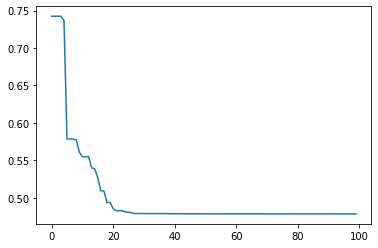

In [30]:
import matplotlib.pyplot as plt

print(f(result_pso.gbest_x))
print(g(result_pso.gbest_x))
sim_smr.interface.SaveFlowsheet(sim_smr.flowsheet, sim_smr.savepath,True)
print(result_pso.gbest_x)
pprint(result_pso)

plt.plot(result_pso.gbest_y_hist)
plt.show()

In [37]:
x_pso=np.array( [11.20833333,  2.20416667,  1.4221668,   7.54165016,  3.45,        7.2       ] )
f(x_pso)


opt_functions calculation at x = [1.12083333e-04 2.20416667e-04 1.42216680e-04 7.54165016e-04
 3.45000000e+05 7.20000000e+06]
f = [0.47836183], g = [7.97450127e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00] at x = [1.12083333e-04 2.20416667e-04 1.42216680e-04 7.54165016e-04
 3.45000000e+05 7.20000000e+06]


array([0.47836183])